In [ ]:
import numpy as np 
import pandas as pd 

def load_housing_data():
    data_frame = pd.read_csv("housing.csv")
    return data_frame

housing_data = load_housing_data()
housing_data.head()

housing_data.info()

housing_data.describe()

housing_data["ocean_proximity"].value_counts()

In [ ]:
def split_train_test(data,test_ratio) :
    np.random.seed(42) 
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffle_indices[0:test_set_size]
    train_indices = shuffle_indices[test_set_size:]
    return data.iloc[test_indices],data.iloc[train_indices]

test_set,trian_set = split_train_test(housing_data,0.2)
print(test_set)

In [ ]:
from sklearn.model_selection import train_test_split

trian_set,test_set = train_test_split(housing_data,0.2,random_state=42)

In [ ]:
housing_data["income_cat"] = np.ceil(housing_data["median_income"]/1.5)
housing_data["income_cat"].where(housing_data["income_cat"] < 5, 5.0, inplace=True)

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing_data,housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]
    
strat_test_set.head()

<Axes: xlabel='longitude', ylabel='latitude'>

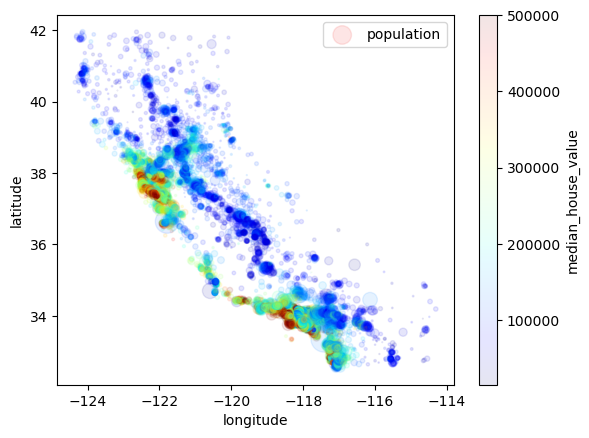

In [76]:
import matplotlib.pyplot as plt 
housing = housing_data.copy()

housing.plot(kind="scatter",x="longitude",y="latitude",alpha = 0.1,
s = housing_data["population"]/100,label = "population",
c = "median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,)

In [77]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

ValueError: could not convert string to float: 'NEAR BAY'

In [ ]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

## Data handling

In [ ]:
housing_prep = strat_train_set("median_house_value",axis=1)
housing_target = strat_train_set["median_house_value"].copy()

housing_prep.dropna(subset="total_bedrooms")
housing_prep.drop("total_bedrooms",axis=1)
median = housing_prep["total_bedrooms"].median()
housing_prep["total_bedrooms"].fillna(median)

from sklearn.preprocessing import Imputer 
imputer = Imputer(stratergy="median")

hosusing_num = housing_prep.drop("ocean_proximity",axis=1)



In [ ]:
def data_missing_values_handling (housing_fn):
    from sklearn.preprocessing import Imputer 
    
    imputer = Imputer(stratergy="median")
    hosusing_num = housing_fn.drop("ocean_proximity",axis=1)
    
    imputer.fit(housing_fn)
    X = imputer.transform(housing_fn)
    
    housing_tr = pd.DataFrame(X,columns=housing_num.columns)



In [ ]:
def data_text_encoder (housing_data):
    from sklearn.preprocessing import LabelEncoder
    
    encoder = LabelEncoder()
    housing_cat = housing_data["ocean_proximity"]
    hosusing_cat_encoded= encoder.fit_transform(housing_cat)
    
    return hosusing_cat_encoded
    

In [9]:
import pandas as pd 

housing_data = pd.read_csv("housing.csv")

def data_text_onthoten (housing_data):
    from sklearn import OneHotEncoder 
    
    one_hot_encoder = OneHotEncoder()
    housing_cat = housing_data["ocean_proximity"]
    housing_cat_onehoten = encoder.fit_transform(housing_cat)
    
    return housing_cat_onehoten

encode_data = data_text_onthoten(housing_data)
encode_data.head()

ImportError: cannot import name 'OneHotEncoder' from 'sklearn' (/opt/anaconda3/lib/python3.12/site-packages/sklearn/__init__.py)